In [1]:
import pandas as pd
import pandas as pd
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer,HashingVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix,accuracy_score

In [2]:
df = pd.read_csv('Fakenewstrain.csv')

In [3]:
df.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [4]:
x = df.drop('label',axis=1)

In [5]:
y=df['label']

In [6]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
y.shape

(20800,)

In [8]:
df = df.dropna()

In [9]:
df.shape

(18285, 5)

In [10]:
messages = df.copy()

In [11]:
messages.reset_index(inplace=True)

In [13]:
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
corpus = []
for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [14]:
tfidf  = TfidfVectorizer(max_features = 5000,ngram_range=(1, 3))
X = tfidf.fit_transform(corpus).toarray()

In [16]:
X.shape

(18285, 5000)

In [17]:
y=messages['label']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

In [19]:
tfidf.get_feature_names()[:20]

['aaron',
 'abandon',
 'abandoned',
 'abc',
 'abe',
 'abedin',
 'ability',
 'able',
 'abortion',
 'abroad',
 'absence',
 'absolute',
 'absolutely',
 'abu',
 'abuse',
 'academic',
 'academy',
 'accept',
 'acceptable',
 'acceptance']

In [20]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [22]:
tfidf_df = pd.DataFrame(X_train,columns=tfidf.get_feature_names())

In [23]:
tfidf_df.head()

aaron  abandon  abandoned  abc  abe  abedin  ability  able  abortion  \
0    0.0      0.0        0.0  0.0  0.0     0.0      0.0   0.0       0.0   
1    0.0      0.0        0.0  0.0  0.0     0.0      0.0   0.0       0.0   
2    0.0      0.0        0.0  0.0  0.0     0.0      0.0   0.0       0.0   
3    0.0      0.0        0.0  0.0  0.0     0.0      0.0   0.0       0.0   
4    0.0      0.0        0.0  0.0  0.0     0.0      0.0   0.0       0.0   

   abroad  ...    young  young people  younger  youth  youtube  zero  zika  \
0     0.0  ...  0.19322           0.0      0.0    0.0      0.0   0.0   0.0   
1     0.0  ...  0.00000           0.0      0.0    0.0      0.0   0.0   0.0   
2     0.0  ...  0.00000           0.0      0.0    0.0      0.0   0.0   0.0   
3     0.0  ...  0.00000           0.0      0.0    0.0      0.0   0.0   0.0   
4     0.0  ...  0.00000           0.0      0.0    0.0      0.0   0.0   0.0   

   zionist  zone   zu  
0      0.0   0.0  0.0  
1      0.0   0.0  0.0  
2      0.0   0.0  0.0  
3      0.0   0.0  0.0  
4      0.0   0.0  0.0  

[5 rows x 5000 columns]

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline


In [25]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [26]:

from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [27]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.896
Confusion matrix, without normalization


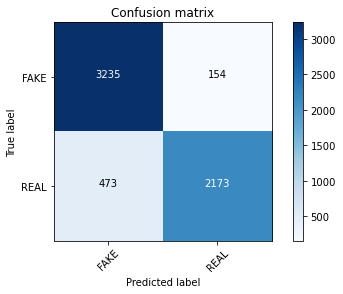

In [28]:

classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

In [29]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.949
Confusion matrix, without normalization


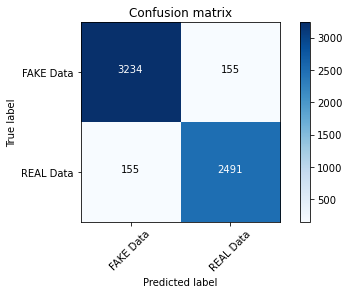

In [30]:

linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [31]:

classifier=MultinomialNB(alpha=0.1)

In [32]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

C:\Users\chara\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:512: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8975973487986744
Alpha: 0.1, Score : 0.8969345484672743
Alpha: 0.2, Score : 0.8961060480530241
Alpha: 0.30000000000000004, Score : 0.8961060480530241
Alpha: 0.4, Score : 0.8961060480530241
Alpha: 0.5, Score : 0.895940347970174
Alpha: 0.6000000000000001, Score : 0.895940347970174
Alpha: 0.7000000000000001, Score : 0.8961060480530241
Alpha: 0.8, Score : 0.895940347970174
Alpha: 0.9, Score : 0.895940347970174


In [34]:
feature_names = tfidf.get_feature_names()

In [35]:
classifier.coef_[0]

array([-9.48079562, -9.66367633, -9.38731198, ..., -8.97470473,
       -8.25347075, -8.38326155])

In [36]:
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-5.360488486498744, 'clinton'),
 (-5.461199369606062, 'trump'),
 (-5.649042712691527, 'hillary'),
 (-6.0147348046088105, 'election'),
 (-6.094382653752093, 'people'),
 (-6.1714379118008305, 'email'),
 (-6.182072789827417, 'state'),
 (-6.183801184340321, 'one'),
 (-6.265009774740158, 'hillary clinton'),
 (-6.270172129847802, 'fbi'),
 (-6.279851144932698, 'would'),
 (-6.3321837308061735, 'american'),
 (-6.3551402359867195, 'time'),
 (-6.35743045373491, 'war'),
 (-6.366549862271015, 'world'),
 (-6.406421611790935, 'year'),
 (-6.418669476152893, 'october'),
 (-6.419895575691186, 'like'),
 (-6.44114924843387, 'new'),
 (-6.441409642054891, 'said')]

In [37]:

### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:20]

[(-10.976872090661884, 'briefing posted'),
 (-10.976872090661884, 'devos'),
 (-10.976872090661884, 'gorsuch'),
 (-10.976872090661884, 'judge gorsuch'),
 (-10.976872090661884, 'mr ailes'),
 (-10.976872090661884, 'mr bannon'),
 (-10.976872090661884, 'mr christie'),
 (-10.976872090661884, 'mr cruz'),
 (-10.976872090661884, 'mr kushner'),
 (-10.976872090661884, 'mr sander'),
 (-10.976872090661884, 'mr spicer'),
 (-10.976872090661884, 'mr xi'),
 (-10.976872090661884, 'pruitt'),
 (-10.976872090661884, 'tillerson'),
 (-10.937503165776459, 'spicer'),
 (-10.93732240420036, 'sean spicer'),
 (-10.933408209891141, 'weekday eastern'),
 (-10.932923205076236, 'mr penny'),
 (-10.91439874809309, 'like mr'),
 (-10.914012059340346, 'said mr trump')]